In [1]:
from selenium import webdriver

# selenium

- 브라우저는 최신버전보다 구버전이 더 잘될수도 있다
    - 크롬, 오페라, 사파리, 익스플로러 등
- https://www.seleniumhq.org/ 도큐먼트 참조해보자

- 기본사용법
- 파일 업로드 다운로드
    - google vision api 웹페이지에서 실습!
- 스크래핑
    - gmarket 베스트셀러 200아이템 정보 수집
    - naver 메일 (본인계정) 데이터 수집
- 자동화
    - 워드프레스 블로그에 자동으로 댓글을 작성
- 이미지 스크린샷
    - youtube 페이지로 실습
    - pillow : python 이미지 처리 패키지
    
    
    
- ★ URL의 쿼리가 깨져서 나오는경우는 url encoder, decoder 구글링해서 하면 됨

### 기본사용법

In [ ]:
#브라우져 열기
driver = webdriver.Chrome()

In [19]:
#페이지 이동
driver.get("http://naver.com")

In [20]:
#브라우저의 윈도우 사이즈 조절
driver.set_window_size(600,800) #(가로,세로)

In [26]:
#스크롤 조절 (자바스크립트코드를 이용)
script = "window.scrollTo(50,200);" #가로,세로
driver.execute_script(script)

In [27]:
#현재 윈도우 객체를 저장
main_window = driver.current_window_handle
main_window

'CDwindow-A312BDE58AAB830128399441B3DEC171'

In [28]:
#새로운 윈도우 탭 열기
script = "window.open('http://google.com');"
driver.execute_script(script)

In [29]:
driver.current_window_handle
#주의 : 현재 current_window_handle이 이전탭이므로 현재 열려있는 윈도우가 아닌 이전 윈도우가 동작한다.

'CDwindow-A312BDE58AAB830128399441B3DEC171'

In [31]:
#윈도우 객체 확인 후 핸들 바꿔주기
windows = driver.window_handles
windows

['CDwindow-A312BDE58AAB830128399441B3DEC171',
 'CDwindow-7E0392515792C4F2ACAD0EA162AE2353']

In [41]:
#현재 윈도우 탭 설정
driver.switch_to_window(windows[1])

In [43]:
#이전것으로 돌아가기
driver.switch_to_window(main_window)

In [49]:
#페이지 새로고침
script = "location.reload();"
driver.execute_script(script)

In [57]:
#알림창 떳을때 대처법1 - alert (닫기버튼)--------------------------------------------
script = "alert('data science');"
driver.execute_script(script)


In [58]:
alert = driver.switch_to_alert()
alert.text

'data science'

In [59]:
alert.accept()

In [61]:
#알림창 떳을때 대처법2 - confirm (확인취소버튼)---------------------------------------
script = "confirm('text selenium');"
driver.execute_script(script)

In [64]:
confirm = driver.switch_to_alert()
confirm.text

'text selenium'

In [65]:
confirm.dismiss() #취소버튼
# confirm.accept() #확인버튼

In [70]:
# 검색어 입력해보기!-----------------------------------
#  ==> input 앨리먼트에 검색어 입력하기!(네이버기준)
driver.find_element_by_css_selector('#query').send_keys("패스트캠퍼스")


In [74]:
#  검색버튼 누르기!
driver.find_element_by_css_selector(".ico_search_submit").click()

In [79]:
#현재윈도우 닫기 
driver.close()

In [82]:
#브라우저 닫기(꼭 quit로 닫아줘야한다. 안그러면 계속 켜져있다)
driver.quit()

## 파일 업로드 (구글 비젼 API활용) 및 데이터 크롤링

- google vision api 페이지
- vision api 페이지로 이동
- iframe frame을 수정
- 이미지 파일 업로드
- 웹데이터와 도큐먼트 데이터를 수집

In [83]:
# 구글 비전 api 페이지 이동
url = 'https://cloud.google.com/vision/'
driver = webdriver.Chrome()
driver.get(url)

driver.set_window_size(600,800) #(가로,세로)사이즈 조절

In [84]:
#iframe 영역으로 frame 변경(iframe 내의 태그는 그냥하면 안되는 경우가 있다)
iframe = driver.find_element_by_css_selector("#vision_demo_section > iframe")
driver.switch_to_frame(iframe)

In [85]:
#메인프레임으로 변경
# driver.switch_do_default_content()

In [88]:
#파일업로드
#파일경로를 쓸때는 절대경로를 입력해야함(/로 디렉토리 사용...)
file_path = "C:/Users/creal/Downloads/dog.png" #업로드할 파일

driver.find_element_by_css_selector("#input").send_keys(file_path)

In [89]:
#웹데이터 가져오기
driver.find_element_by_css_selector('#webDetection').click()

In [101]:
results = driver.find_elements_by_css_selector("#card .container > .row")[:15]
#여기서는 여러개 불러오기때문에 elements로 써야한다.
for result in results:
    print(
    result.find_element_by_css_selector(".name").text,
    result.find_element_by_css_selector(".score").text
    )
    

French Bulldog 1.28992
Boston Terrier 1.27976
Bulldog 1.27812
Bull Terrier 1.06377
Soft-coated Wheaten Terrier 1.00061
Puppy 0.97935
Border Collie 0.78553
Terrier 0.6456
Pet 0.6285
Brindle 0.5512
Dog breed 0.4961
Veterinarian 0.4276
Breed 0.4201
Black Brindle 0.4118
Dog 0


In [ ]:
#잘했어요~

In [102]:
#문자열데이터가져오기
driver.find_element_by_css_selector('#fullTextAnnotation').click()

In [103]:
fieldsets = driver.find_elements_by_css_selector\
(".page > .container.style-scope.vs-document > \
fieldset")
len(fieldsets)

2

In [117]:
documents = [] #문장2개가 들어갑니다.

for fieldset in fieldsets: #문자열 정리하기!!! 노가다도 필요한법!
    words = fieldset.find_elements_by_css_selector(".container .word")
    word_list = []
    for word in words:
        word = word.text.replace(" ","").replace("'","")
        word_list.append(word)
    documents.append(" ".join(word_list))
documents

['In the dog house', ' 인기를 잃다 , 면목을 잃다']

In [118]:
driver.quit()

In [ ]:
#잘했어요!!!~~~

# Gmarket Scraping (스크래핑)

- gmarket 베스트 200 데이터 수집
- http://corners.gmarket.co.kr/Bestsellers

In [120]:
url = 'http://corners.gmarket.co.kr/Bestsellers'
driver = webdriver.Chrome()
driver.get(url)

In [152]:
items = driver.find_elements_by_css_selector(".best-list:nth-child(3) > ul > li")
# len(items) #위치확인

dict_list = []

for item in items[:40]:
    dict_list.append({
        'title' : item.find_element_by_css_selector(".itemname").text,
        'link' : item.find_element_by_css_selector(".itemname").get_attribute("href"),  #속성 url가져오기
        'o-price' : item.find_element_by_css_selector(".o-price").text.replace(",","")[:-1], #텍스트 숫자변환
        's-price' : item.find_element_by_css_selector(".s-price").text.split(" ")[0].replace(",","")[:-1],
    })
df = pd.DataFrame(dict_list,columns=["title","o-price","s-price","link"])
df

,title,o-price,s-price,link
0,더다다/원피스형 롱티/신상/루즈/박시/빅사이즈,19500,5900,http://item.gmarket.co.kr/Item?goodscode=62724...
1,[아디다스]니짜 CQ2332외 4종 택1 G/ 아디다스,39000,28470,http://item.gmarket.co.kr/Item?goodscode=14301...
2,[동원샘물미네마인]동원 샘물 2Lx9병x3팩(총 27병) /생수,30000,12900,http://item.gmarket.co.kr/Item?goodscode=63617...
3,[아망떼]1+1여름베개커버/인견/순면/30x50/40x60/50x70,24000,4900,http://item.gmarket.co.kr/Item?goodscode=41037...
4,[하기스]2018년형 에어솔솔 썸머 팬티 / 밴드 기저귀 2팩,39900,32900,http://item.gmarket.co.kr/Item?goodscode=14365...
5,[하림]하림 프로라인 치킨너겟 1kg 2봉+치킨너겟 100g(증정),20000,12900,http://item.gmarket.co.kr/Item?goodscode=13005...
6,[동원덴마크우유]동원 인포켓치즈 20g x20개+(저키x8개 or 치즈디퍼즈),30000,13900,http://item.gmarket.co.kr/Item?goodscode=87359...
7,유스타일팜 여름신상/빅사이즈/밴딩/데님/스커트,29600,8900,http://item.gmarket.co.kr/Item?goodscode=86949...
8,CJ 햇반210gx24개/오뚜기밥24개/컵밥10개/컵반,27100,16900,http://item.gmarket.co.kr/Item?goodscode=91202...
9,나이키 스우시 라운드 반팔 티셔츠,29000,14900,http://item.gmarket.co.kr/Item?goodscode=14298...


In [153]:
#빈칸채우기 (o-price의 빈부분 s-price로 채우기)
is_nodata = df["o-price"] == ""

df["o-price"][is_nodata] = df["s-price"][is_nodata]

In [154]:
# 할인율 컬럼을 추가하기 (27%)
df['discount-rate'] = \
round((1 - df["s-price"].astype('int') / df["o-price"].astype('int'))*100,0)
df['discount-rate'] = df['discount-rate'].astype('int')
df['discount-rate'] = df['discount-rate'].astype('str')
df['discount-rate'] += "%"
df

,title,o-price,s-price,link,discount-rate
0,더다다/원피스형 롱티/신상/루즈/박시/빅사이즈,19500,5900,http://item.gmarket.co.kr/Item?goodscode=62724...,70%
1,[아디다스]니짜 CQ2332외 4종 택1 G/ 아디다스,39000,28470,http://item.gmarket.co.kr/Item?goodscode=14301...,27%
2,[동원샘물미네마인]동원 샘물 2Lx9병x3팩(총 27병) /생수,30000,12900,http://item.gmarket.co.kr/Item?goodscode=63617...,57%
3,[아망떼]1+1여름베개커버/인견/순면/30x50/40x60/50x70,24000,4900,http://item.gmarket.co.kr/Item?goodscode=41037...,80%
4,[하기스]2018년형 에어솔솔 썸머 팬티 / 밴드 기저귀 2팩,39900,32900,http://item.gmarket.co.kr/Item?goodscode=14365...,18%
5,[하림]하림 프로라인 치킨너겟 1kg 2봉+치킨너겟 100g(증정),20000,12900,http://item.gmarket.co.kr/Item?goodscode=13005...,36%
6,[동원덴마크우유]동원 인포켓치즈 20g x20개+(저키x8개 or 치즈디퍼즈),30000,13900,http://item.gmarket.co.kr/Item?goodscode=87359...,54%
7,유스타일팜 여름신상/빅사이즈/밴딩/데님/스커트,29600,8900,http://item.gmarket.co.kr/Item?goodscode=86949...,70%
8,CJ 햇반210gx24개/오뚜기밥24개/컵밥10개/컵반,27100,16900,http://item.gmarket.co.kr/Item?goodscode=91202...,38%
9,나이키 스우시 라운드 반팔 티셔츠,29000,14900,http://item.gmarket.co.kr/Item?goodscode=14298...,49%


In [155]:
driver.quit()

In [ ]:
#잘했어요~!!

# 네이버 메일 크롤링
- 네이버 페이지로 이동
- 아이디 패스워드를 입력
- 로그인 버튼 클릭
- 메일 페이지로 이동
- 메일 페이지에서 메일 데이터를 수집

In [156]:
main_url = "https://naver.com"
mail_url = "https://mail.naver.com"

In [157]:
driver = webdriver.Chrome()
driver.get(main_url)

In [158]:
driver.find_element_by_css_selector("#id").send_keys("uziminigun")
driver.find_element_by_css_selector("#pw").send_keys("")#비밀번호 입력... 노출을 꺼리면 피클화해서 불러오자

In [167]:
#로그인 버튼 클릭
driver.find_element_by_css_selector('.btn_login > input[type=submit]').click()

In [168]:
driver.get(mail_url)

In [169]:
mails = driver.find_elements_by_css_selector(".mailList > li")
len(mails)

10

In [171]:
dict_mail = []

for mail in mails:
    name = mail.find_element_by_css_selector(".name > a").text
    title = mail.find_element_by_css_selector(".mail_title").text
    dict_mail.append({"name":name,"title":title})

df = pd.DataFrame(dict_mail)
df

,name,title
0,Facebook,"친구 추천에 원연정님, 김정아님 외 8이 추가되었습니다"
1,창업신문,"(광고) 창업, 시작이 절반의 성공입니다. 성공창업을 위한 무점포1인창업과 창업정보..."
2,에브리존,[터보백신 인포 레터] 2018년6월20일 최신 엔진 업데이트와 보안 이슈를 확인해...
3,Facebook,"Soph David님, 새 알림 64개, 친구 요청 1개가 있습니다"
4,에브리존,[터보백신 인포 레터] 2018년6월19일 최신 엔진 업데이트와 보안 이슈를 확인해...
5,(사)한국물가정보,[안내] 원가계산프로그램 '웹코스트' 정식오픈 1주년 기념 이벤트!
6,구두마루,(광고) 월드컵 응원하면 매일매일 만원쿠폰
7,에브리존,[터보백신 인포 레터] 2018년6월18일 최신 엔진 업데이트와 보안 이슈를 확인해...
8,Facebook,"친구 추천에 김민혁님, 정인혜님 외 8이 추가되었습니다"
9,Facebook,"Soph David님, 새 알림 62개, 친구 요청 1개가 있습니다"


In [ ]:
url = 'https://mail.naver.com/?n=1529567866002&v=f#{"fClass":"list","oParameter":{"page":"'2'","sortField":"1","sortType":"0","folderSN":"0","type":"","isUnread":false}}'

In [174]:
driver.quit()

In [173]:
#잘했어요~

# 자동화 (댓글자동달아보기)

- 테스트페이지 https://radajin661456067.wordpress.com/
- 2개의 계정, 2개의 메시지, 2개의 게시글에 총 8개의 댓글을 자동으로 작성
- 게시물의 링크를 크롤링
- 각 게시물로 가서 댓글을 작성
    - 댓글 작성 레이어를 클릭
    - 댓글작성
    - 이메일, 이름추가
    - 댓글작성버튼 클릭


In [175]:
url = 'https://radajin661456067.wordpress.com/'
driver = webdriver.Chrome()
driver.get(url)

In [177]:
#main > article
#링크데이터 가져오기
links = []
articles = driver.find_elements_by_css_selector("#main > article")
for article in articles:
    links.append(article.find_element_by_css_selector(".entry-title > a").get_attribute("href"))
    
links

['https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/',
 'https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/']

In [178]:
#링크이동

driver.get(links[0])

In [179]:
#스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [181]:
#댓글작성영역 클릭하기
driver.find_element_by_css_selector("#comment-form-comment").click()


In [183]:
#댓글작성하기
driver.find_element_by_css_selector("#comment").send_keys("드루킹을 넘는자")

In [184]:
#스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [185]:
#이메일 이름 입력
driver.find_element_by_css_selector("#email").clear()
driver.find_element_by_css_selector("#email").send_keys("drewking_killer@gmail.com")
driver.find_element_by_css_selector("#author").clear()
driver.find_element_by_css_selector("#author").send_keys("drewking_killer")

In [186]:
#작성버튼을 클릭
driver.find_element_by_css_selector("#comment-submit").click()

In [187]:
#그럼 함수를 만들어보자!-----------------------------------
import time

#드루킹함수
def write_comment(driver, link, msg, email, name):
    driver.get(link)
    script = "window.scrollTo(0,10000);"
    driver.execute_script(script)
    time.sleep(1)
    driver.find_element_by_css_selector("#comment-form-comment").click()
    driver.find_element_by_css_selector("#comment").send_keys(msg)
    driver.execute_script(script)
    time.sleep(1)
    driver.find_element_by_css_selector("#email").clear()
    driver.find_element_by_css_selector("#email").send_keys(email)
    time.sleep(1)
    driver.find_element_by_css_selector("#author").clear()
    driver.find_element_by_css_selector("#author").send_keys(name)
    time.sleep(1)
    driver.find_element_by_css_selector("#comment-submit").click()

In [191]:
users = [
    {'name':"알바1", "email":"albamon@naver.com"},
    {"name":"알바2", "email":"creall@naver.com"}
]
msgs = ["저녁곱창","ㅇㅋㄷㅋ"]

In [192]:
for user in users:
    for msg in msgs:
        for link in links:
            print(user['email'],user['name'],msg, end=" - ")
            try:
                write_comment(driver, link, msg, user["email"],user['name'])
                print("성공")
            except:
                print("실패")


albamon@naver.com 알바1 저녁곱창 - 성공
albamon@naver.com 알바1 저녁곱창 - 성공
albamon@naver.com 알바1 ㅇㅋㄷㅋ - 성공
albamon@naver.com 알바1 ㅇㅋㄷㅋ - 성공
creall@naver.com 알바2 저녁곱창 - 성공
creall@naver.com 알바2 저녁곱창 - 성공
creall@naver.com 알바2 ㅇㅋㄷㅋ - 성공
creall@naver.com 알바2 ㅇㅋㄷㅋ - 성공


In [194]:
# 잘했어요~ 굿굿

In [195]:
## 유튜브 이미지 스크린샷 찍어서 구글비전에 바로 누구인지 찾게하는 시스템 만들어보기(재밌겠다~~)

In [196]:
driver.quit()

# 이미지 스크린샷!

- pillow설치 4.0버전... (4.1x버전은 주피터에서 에러발생하니 피할것..) (conda install -c anaconda pillow==4.0.0)

In [2]:
from PIL import Image as pil
import time

In [3]:
#이미지 스크린샷----------------------------------------------
url = "https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s"
driver = webdriver.Chrome()
driver.get(url)
for idx in range(5):
    time.sleep(1)
    driver.save_screenshot("imgs/screenshot"+str(idx)+".png") #스크린샷함수 - 성공하면 true가 뜬다
driver.quit()

In [52]:
driver.quit()

(1295, 838)


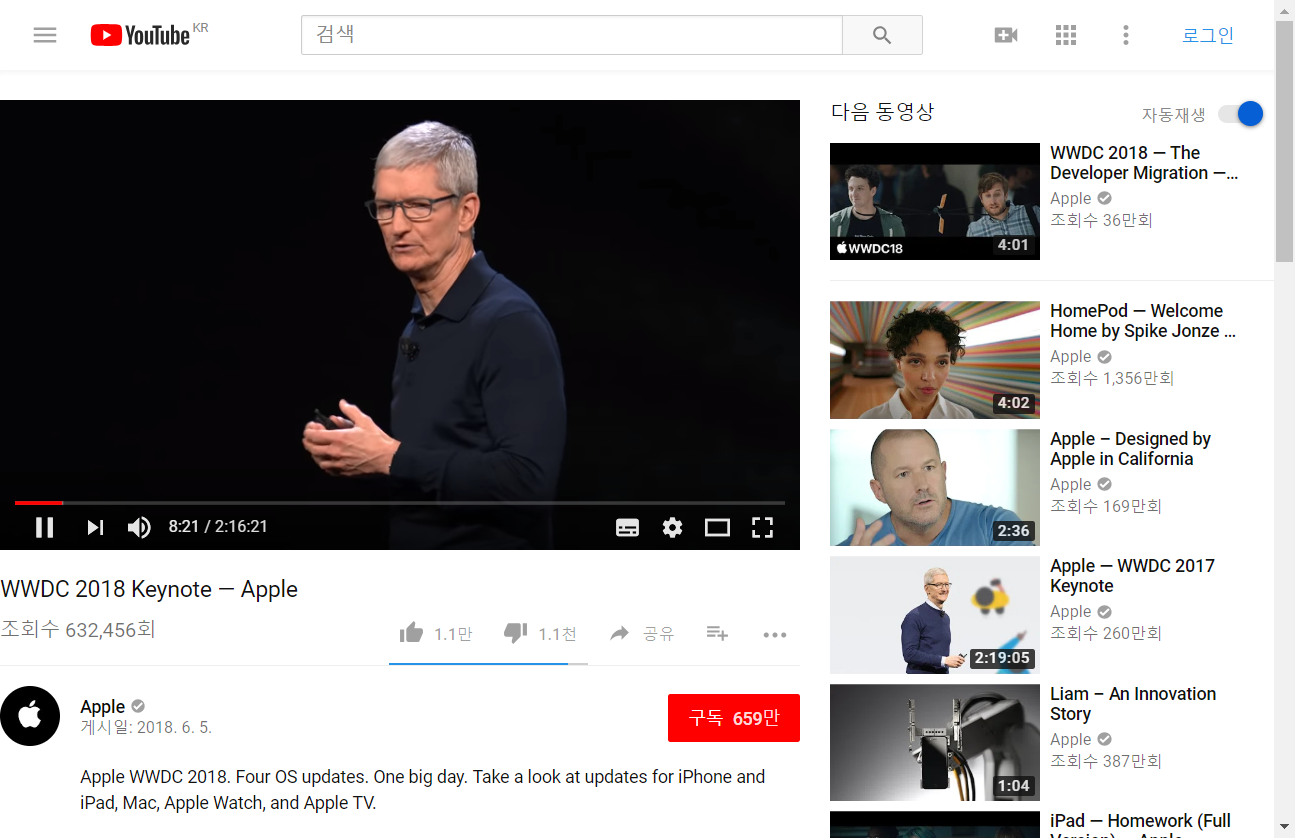

In [4]:
#이미지 띄우기-----------------------------------
pil_im = pil.open("imgs/screenshot0.png")
print(pil_im.size) #사이즈보기
pil_im

In [5]:
# id가 player-container인 엘리먼트의 영역의 위치값 구하기
driver = webdriver.Chrome()
driver.get(url)

In [6]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

({'x': 0, 'y': 80}, {'height': 360, 'width': 640})

In [7]:
driver.quit()

In [49]:
# top, bottom, left, right
# 레티나 디스플레이의 경우 *2를 해줘야함
# 또는 윈도우의 경우 사용환경을 위해 1.25배나 1.5배의 확대 설정이 되어있을 수 있다. 참고하자.
left = location['x']
top = location['y'] + 20
right = left + size['width']*1.25
bottom = top + size['height']*1.25
area = (left, top, right, bottom)
area

(0, 100, 800.0, 550.0)

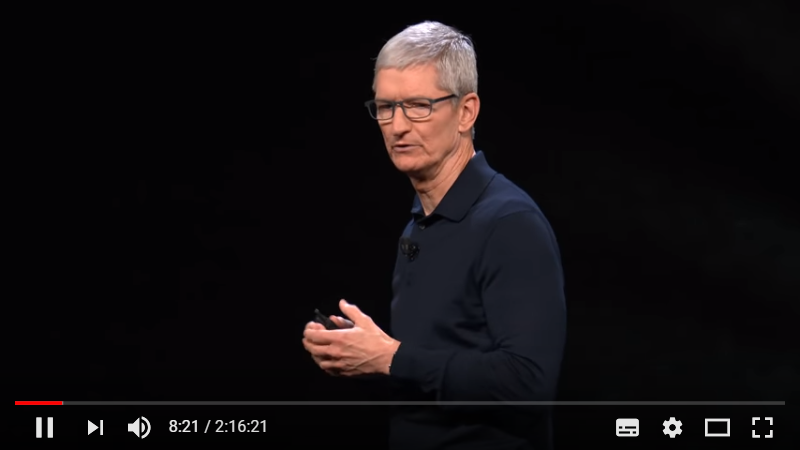

In [50]:
pil_im = pil.open("imgs/screenshot0.png")
pil_im = pil_im.crop(area)
pil_im

In [51]:
pil_im.save("imgs/screenshot_element.png") #자른파일 저장

In [ ]:
#잘했어요~~~~~~~~~~~~~

In [20]:
#하단의 재생기능 영역 자르기----------------------------------------------------
driver = webdriver.Chrome()
driver.get(url)

In [14]:
#height만 확인
element = driver.find_element_by_css_selector(".ytp-chrome-bottom")
location = element.location
size = element.size
location, size

({'x': 12, 'y': 401}, {'height': 39, 'width': 616})

In [15]:
#원래사이즈로딩
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

({'x': 0, 'y': 80}, {'height': 360, 'width': 640})

In [16]:
driver.quit()

In [61]:
# top, bottom, left, right
# 레티나 디스플레이의 경우 *2를 해줘야함
left = location['x']
top = location['y'] + 20
right = left + size['width']*1.25
bottom = top + (size['height']-39)*1.25
area = (left, top, right, bottom)
area

(0, 100, 800.0, 501.25)

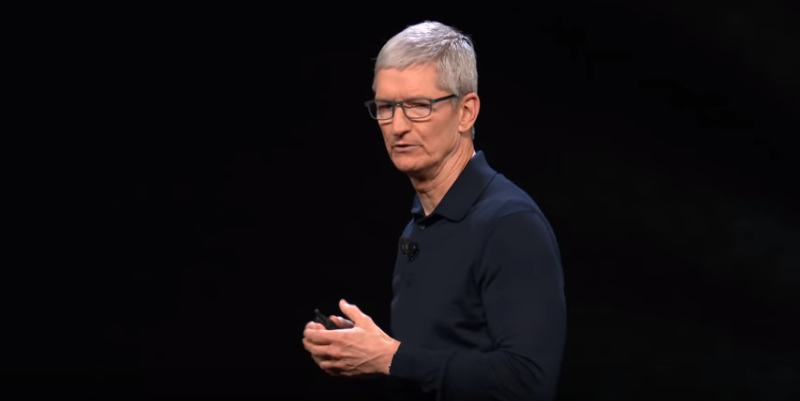

In [62]:
pil_im = pil.open("imgs/screenshot0.png")
pil_im = pil_im.crop(area)
pil_im

In [63]:
pil_im.save("imgs/screenshot_element_rmcontrolbar.png") #자른파일 저장

In [ ]:
#잘했어요~~~~~~~~~`

In [64]:
#썸네일 만들기 -------------------------------------
pil_im.size

(800, 401)

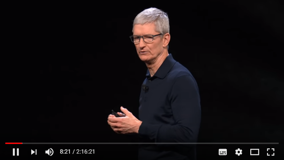

In [69]:
pil_im = pil.open("imgs/screenshot_element.png")

pil_im.thumbnail((320,160))
pil_im

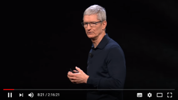

In [70]:
pil_im.thumbnail((200,100))
pil_im

In [68]:
pil_im.save("imgs/screenshot0_thumbnail.png")

In [ ]:
# 잘했어요~~~~~~~~~~~~~~~

# 이젠 저장한 이미지를 비전 API로 보내서 이미지 분석을 해보자!!

In [76]:
# 구글 비전 api 페이지 이동
url = 'https://cloud.google.com/vision/'
driver = webdriver.Chrome()
driver.get(url)

driver.set_window_size(1200,800) #(가로,세로)사이즈 조절


#iframe 영역으로 frame 변경(iframe 내의 태그는 그냥하면 안되는 경우가 있다)
iframe = driver.find_element_by_css_selector("#vision_demo_section > iframe")
driver.switch_to_frame(iframe)

In [77]:
#파일업로드
#파일경로를 쓸때는 절대경로를 입력해야함(/로 디렉토리 사용...)
file_path = "C:/dss/imgs/screenshot0_thumbnail.png" #업로드할 파일

driver.find_element_by_css_selector("#input").send_keys(file_path)


time.sleep(3)
#웹데이터 가져오기
driver.find_element_by_css_selector('#webDetection').click()

In [78]:
results = driver.find_elements_by_css_selector("#card .container > .row")[:15]
#여기서는 여러개 불러오기때문에 elements로 써야한다.
for result in results:
    print(
    result.find_element_by_css_selector(".name").text,
    result.find_element_by_css_selector(".score").text
    )

Apple Worldwide Developers Confe... 1.33395
 0.6904
Apple 0.4936
 0.466
 0.4281
iOS 12 0.4149
macOS Mojave 0.3946
Augmented reality 0.3598
Chief Executive 0.3597
 0.3506
Siri 0.3416
iOS 0.3378
Technology 0.3316
Phenomenon 0.24203
Tim Cook 0.10544


In [79]:
driver.quit()